# Importing Necessary Libraries

In [5]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install pytubefix
!pip install ultralytics
# Clean up the notebook
clean_notebook()



Notebook cleaned.


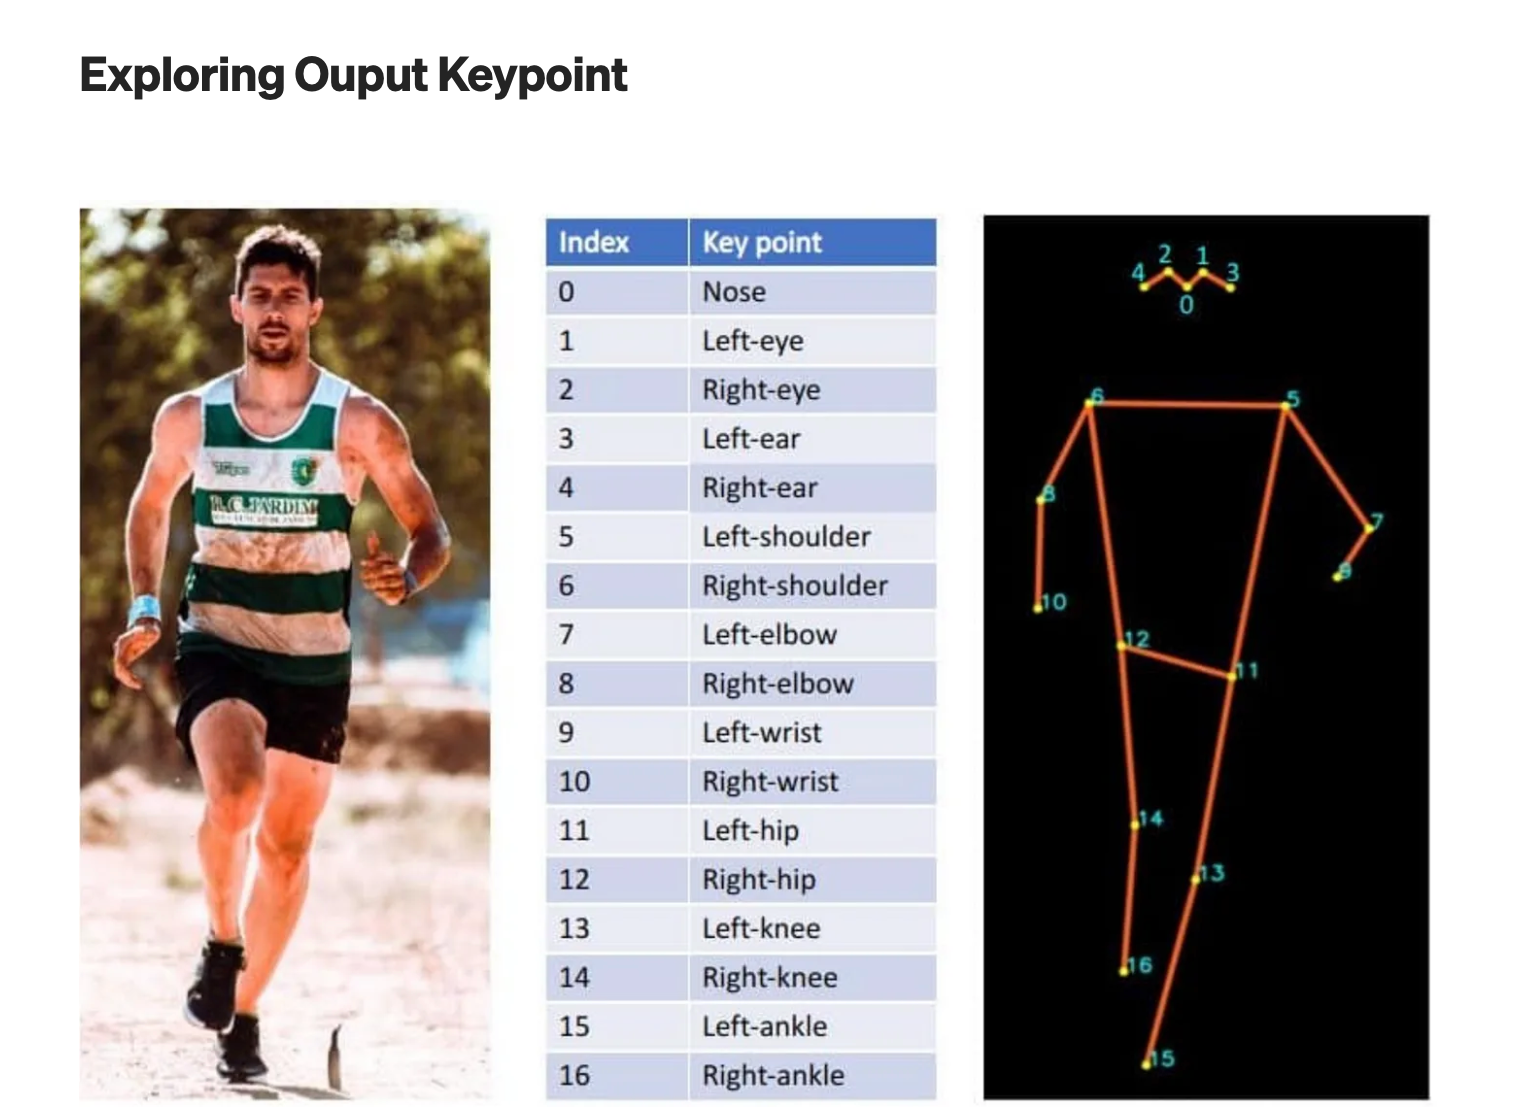
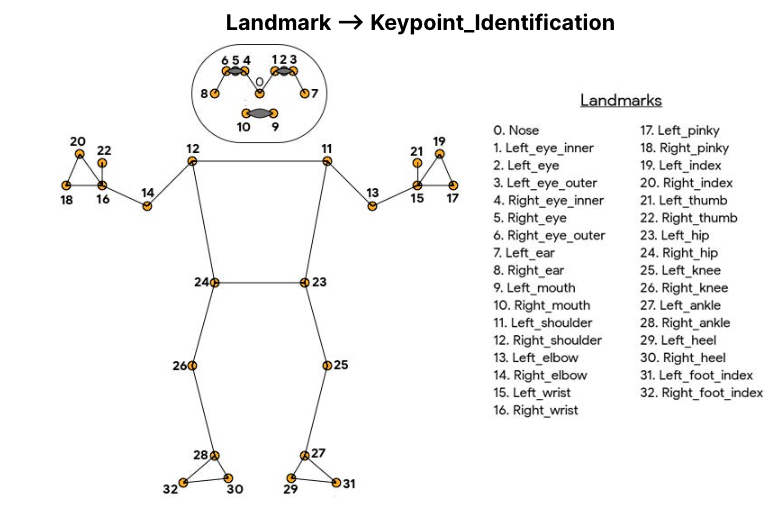

In [1]:

import ultralytics
ultralytics.checks()

Ultralytics 8.3.241 🚀 Python-3.12.3 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32607MiB)
Setup complete ✅ (32 CPUs, 61.6 GB RAM, 115.5/1006.9 GB disk)



image 1/1 /home/student/workspace/DL-FOR-COMPUTER-VISION/week06/../images/Karate00.jpg: 224x320 1 person, 20.4ms
Speed: 2.6ms preprocess, 20.4ms inference, 23.7ms postprocess per image at shape (1, 3, 224, 320)


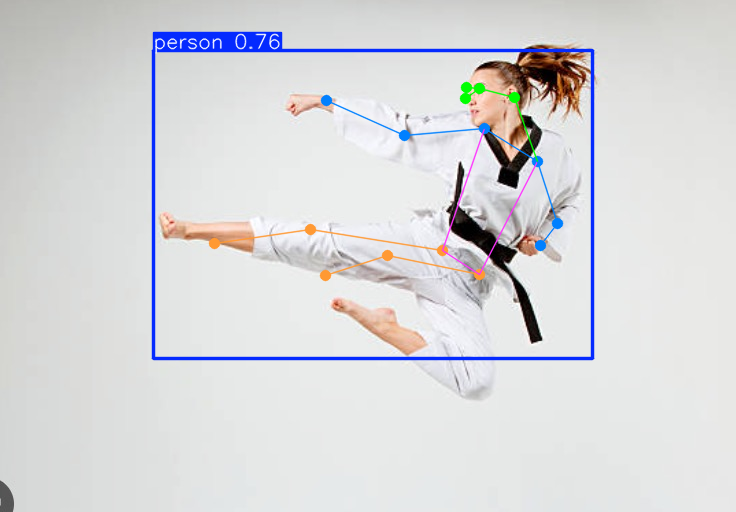

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-pose.pt")

image_path = ".././images/Karate00.jpg"


# Perform object detection on an image
results = model(image_path, imgsz= 320)
results[0].show()

In [10]:
results[0].keypoints.data.cpu().numpy().shape

(1, 17, 3)

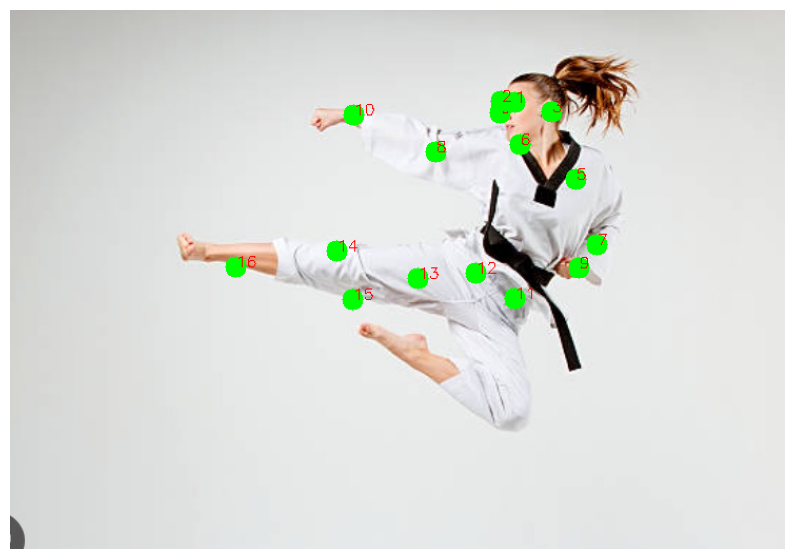

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Iterate over detected persons
for person in results[0].keypoints.data.cpu().numpy():
   
    for idx, keypoint in enumerate(person):
        x, y, confidence = keypoint
        if confidence > 0.5:  # Draw only if confidence is above a threshold
            cv2.circle(image_rgb, (int(x), int(y)), radius=10, color=(0, 255, 0), thickness=-1)
            cv2.putText(image_rgb, str(idx), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

# To integrate reading a YouTube stream with Pose

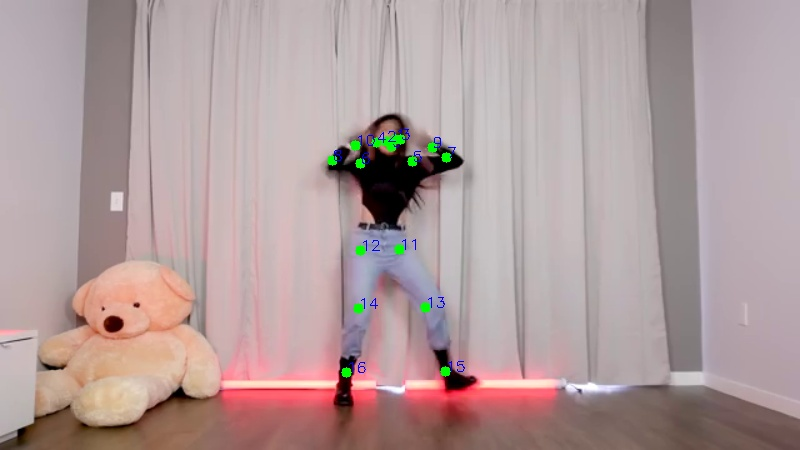

In [ ]:
import cv2
from IPython.display import display, Image, clear_output
from pytubefix import YouTube
from ultralytics import YOLO

# Set the desired width for resizing frames
set_width = 800

# Load your YOLO pose estimation model
model = YOLO("yolo11n-pose.pt")  # Replace with your pose estimation model

# YouTube video URL
video_url = "https://youtu.be/0e8UkTGnzIw?si=v-bro26r3LfUpNfH"

# Fetch the video stream URL using pytube
yt = YouTube(video_url)
video_stream = yt.streams.filter(file_extension='mp4', progressive=True,).first()

if not video_stream:
    print("No compatible video stream found.")
    raise RuntimeError("Failed to fetch video stream.")

# Get the stream URL
stream_url = video_stream.url

# Open the YouTube stream in OpenCV
cap = cv2.VideoCapture(stream_url)

if not cap.isOpened():
    print(f"Error: Could not open YouTube video stream.")
    cap.release()
    raise RuntimeError("Video initialization failed.")

try:
    while True:
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            print("End of video or failed to grab frame.")
            break

        # Resize the frame for faster processing
        ratio = set_width / frame.shape[1]
        frame = cv2.resize(frame, (set_width, int(frame.shape[0] * ratio)))

        # Run pose estimation on the frame
        results = model(frame, verbose=False)

        # Iterate over detected persons and draw keypoints
        for person in results[0].keypoints.data.cpu().numpy():
            for idx, keypoint in enumerate(person):
                x, y,score = keypoint
                cv2.circle(frame, (int(x), int(y)), radius=5, color=(0, 255, 0), thickness=-1)
                cv2.putText(frame, str(idx), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

        # Encode the frame as JPEG
        _, buffer = cv2.imencode('.jpg', frame)
        img_bytes = buffer.tobytes()

        # Display the frame inline in the notebook
        display(Image(data=img_bytes))
        clear_output(wait=True)
finally:
    cap.release()


# Collect Dataset into pandas

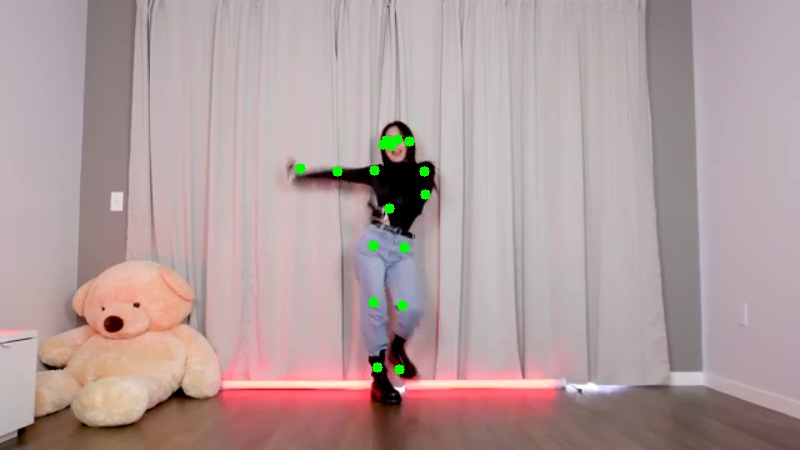

End of video or failed to grab frame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   frame_number       120 non-null    int64  
 1   timestamp          120 non-null    float64
 2   person_id          120 non-null    int64  
 3   image_bytes        120 non-null    object 
 4   keypoint_0_x       120 non-null    float32
 5   keypoint_0_y       120 non-null    float32
 6   keypoint_0_score   120 non-null    float32
 7   keypoint_1_x       120 non-null    float32
 8   keypoint_1_y       120 non-null    float32
 9   keypoint_1_score   120 non-null    float32
 10  keypoint_2_x       120 non-null    float32
 11  keypoint_2_y       120 non-null    float32
 12  keypoint_2_score   120 non-null    float32
 13  keypoint_3_x       120 non-null    float32
 14  keypoint_3_y       120 non-null    float32
 15  keypoint_3_score   120 non-null    f

In [29]:
import cv2
import pandas as pd
from IPython.display import display, Image, clear_output
from pytubefix import YouTube
from ultralytics import YOLO
import time
import random

# Specify start and end times (in seconds)
start_time_seconds = 30  # Start at 30 seconds
end_time_seconds = 50    # End at 60 seconds
# Set frame sampling interval
frame_interval = 5  # Process every 5th frame

# Set the desired width for resizing frames
set_width = 800

# Load your YOLO pose estimation model
model = YOLO("yolo11n-pose.pt")

# YouTube video URL
video_url = "https://youtu.be/0e8UkTGnzIw?si=v-bro26r3LfUpNfH"

# Fetch the video stream URL using pytube
yt = YouTube(video_url)
video_stream = yt.streams.filter(file_extension='mp4', progressive=True).first()

if not video_stream:
    print("No compatible video stream found.")
    raise RuntimeError("Failed to fetch video stream.")

# Get the stream URL
stream_url = video_stream.url

# Open the YouTube stream in OpenCV
cap = cv2.VideoCapture(stream_url)

if not cap.isOpened():
    print(f"Error: Could not open YouTube video stream.")
    cap.release()
    raise RuntimeError("Video initialization failed.")

# Initialize a list to store data for the DataFrame
data_list = []
frame_count = 0
start_time = time.time()

# Set the starting frame
fps = cap.get(cv2.CAP_PROP_FPS)
start_frame = int(fps * start_time_seconds)
end_frame = int(fps * end_time_seconds)

cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or cap.get(cv2.CAP_PROP_POS_FRAMES) > end_frame:
            print("End of video or failed to grab frame.")
            break

        frame_count += 1

        # Skip frames based on interval
        if frame_count % frame_interval != 0:
            continue

        current_time = time.time() - start_time

        # Resize the frame
        ratio = set_width / frame.shape[1]
        frame = cv2.resize(frame, (set_width, int(frame.shape[0] * ratio)))

        # Run pose estimation on the frame
        results = model(frame, verbose=False)

        # Draw keypoints on the frame
        for person in results[0].keypoints.data.cpu().numpy():
            for keypoint in person:
                x, y, score = keypoint
                if score > 0.5:  # Confidence threshold
                    cv2.circle(frame, (int(x), int(y)), 5, (0, 255, 0), -1)

        # Encode the frame as JPEG for storing in the DataFrame
        _, buffer = cv2.imencode('.jpg', frame)
        img_bytes = buffer.tobytes()

        # Extract and store data for each person detected
        for person_idx, person in enumerate(results[0].keypoints.data.cpu().numpy()):
            keypoints_data = {}
            for idx, keypoint in enumerate(person):
                x, y, score = keypoint
                keypoints_data[f'keypoint_{idx}_x'] = x
                keypoints_data[f'keypoint_{idx}_y'] = y
                keypoints_data[f'keypoint_{idx}_score'] = score

            data_entry = {
                'frame_number': frame_count,
                'timestamp': current_time,
                'person_id': person_idx,
                'image_bytes': img_bytes,
                **keypoints_data
            }
            data_list.append(data_entry)

        clear_output(wait=True) 
        display(Image(data=img_bytes))
       

finally:
    cap.release()

# Create the Pandas DataFrame
df = pd.DataFrame(data_list)
df.info()



In [30]:
df.head(10)

,frame_number,timestamp,person_id,image_bytes,keypoint_0_x,keypoint_0_y,keypoint_0_score,keypoint_1_x,keypoint_1_y,keypoint_1_score,...,keypoint_13_score,keypoint_14_x,keypoint_14_y,keypoint_14_score,keypoint_15_x,keypoint_15_y,keypoint_15_score,keypoint_16_x,keypoint_16_y,keypoint_16_score
0,5,0.096819,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,457.928802,133.715851,0.988290,462.308228,127.769997,0.965191,...,0.997552,410.000153,313.498383,0.995673,477.151459,387.653809,0.985952,400.270325,380.200134,0.979717
1,10,0.236897,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,456.446838,134.491745,0.984432,460.564148,129.702911,0.945153,...,0.998425,410.594238,315.075653,0.996763,478.135345,387.488953,0.988408,397.142334,376.706543,0.981082
2,15,0.253859,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,452.717896,135.823441,0.986334,457.670471,130.618042,0.962024,...,0.997290,409.727448,316.122467,0.994023,478.227417,387.182312,0.983030,396.567322,377.514404,0.971159
3,20,0.270978,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,444.617462,139.868881,0.980221,449.667206,133.479340,0.971442,...,0.998125,409.033142,314.584473,0.992842,481.245148,387.150574,0.987406,397.529358,379.043427,0.970454
4,25,0.288255,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,455.652313,130.372971,0.992285,461.435425,125.606628,0.976747,...,0.998639,410.260559,312.771912,0.998087,482.405548,390.531769,0.988790,402.833984,377.701172,0.986745
5,30,0.305734,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,457.511322,125.403526,0.991047,463.929077,121.592094,0.978124,...,0.998892,412.689087,313.071289,0.997951,486.556519,393.588593,0.989835,403.056183,374.292664,0.985673
6,35,0.322707,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,456.605774,127.122452,0.986648,463.457703,123.184204,0.967767,...,0.998764,415.393860,312.283966,0.997322,475.038208,395.661377,0.988717,400.250977,374.890991,0.981962
7,40,0.340893,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,456.024231,130.418564,0.985336,463.535156,126.605438,0.972190,...,0.998925,416.067139,313.836182,0.997386,473.736267,395.598755,0.991335,403.972046,377.424316,0.985155
8,45,0.358191,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,459.525452,136.647644,0.989766,466.114319,132.365341,0.970452,...,0.998473,418.069153,313.662659,0.998204,476.133545,388.796326,0.990574,405.756287,381.109283,0.989940
9,50,0.375157,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,459.559998,131.681427,0.983309,466.828278,126.977081,0.960685,...,0.996580,423.545166,310.973267,0.998226,476.967346,387.360840,0.990630,413.714294,382.302429,0.994412


In [31]:
import numpy as np 
sampled_images = df.sample(n=5)

In [33]:
sampled_images

,frame_number,timestamp,person_id,image_bytes,keypoint_0_x,keypoint_0_y,keypoint_0_score,keypoint_1_x,keypoint_1_y,keypoint_1_score,...,keypoint_13_score,keypoint_14_x,keypoint_14_y,keypoint_14_score,keypoint_15_x,keypoint_15_y,keypoint_15_score,keypoint_16_x,keypoint_16_y,keypoint_16_score
22,115,0.610896,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,424.930115,116.831085,0.989937,432.485535,112.461769,0.976113,...,0.990887,411.531677,306.470398,0.991990,437.822540,384.972351,0.949292,426.759674,380.365448,0.956422
80,405,1.612535,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,407.318359,143.903336,0.982638,414.552582,140.434143,0.970790,...,0.998667,385.287415,308.513245,0.997514,436.116577,390.889282,0.989712,401.228302,376.313324,0.985979
88,445,1.747029,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,394.890564,134.915939,0.994278,400.692017,130.334656,0.970903,...,0.998319,354.937286,314.799652,0.998540,436.223785,380.377380,0.986222,328.892975,378.066956,0.987673
64,325,1.341664,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,390.591583,148.522720,0.943250,394.446472,140.775146,0.940645,...,0.989918,358.911804,300.660370,0.967150,394.411346,365.577515,0.960271,395.791260,370.105133,0.918415
71,360,1.460568,0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,393.670013,132.252914,0.842635,399.137817,128.214188,0.736586,...,0.997778,383.287323,313.801727,0.998053,414.691284,385.778809,0.989782,404.254944,385.826416,0.991495


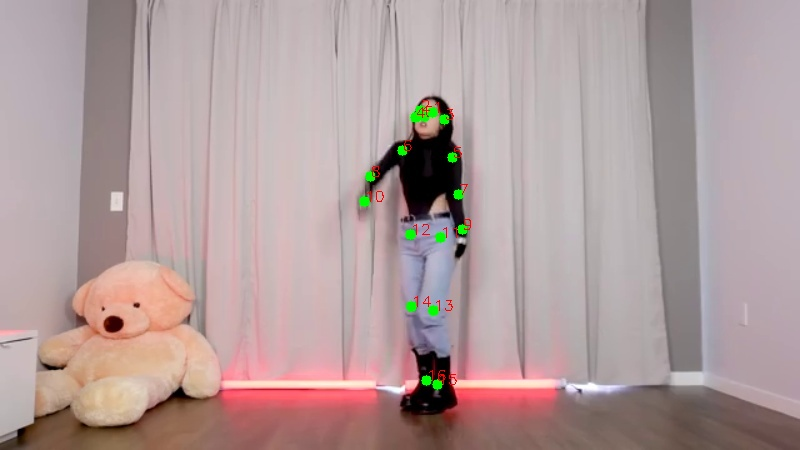

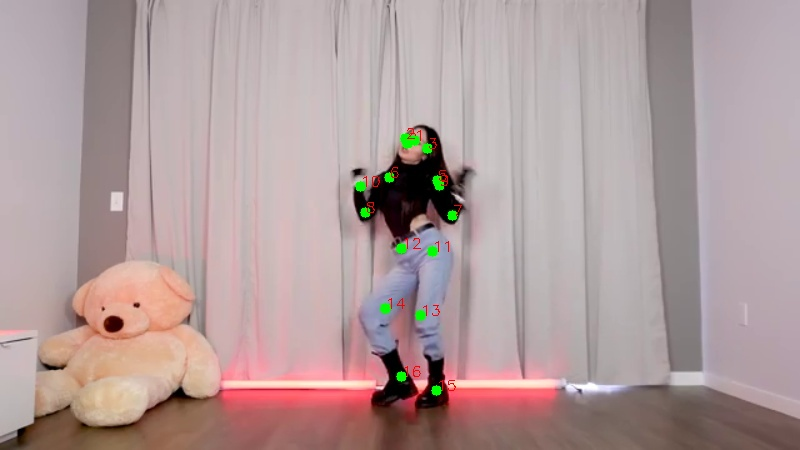

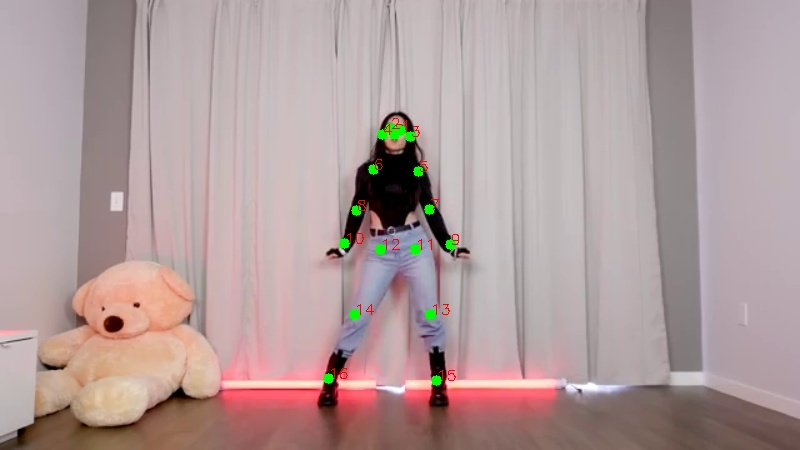

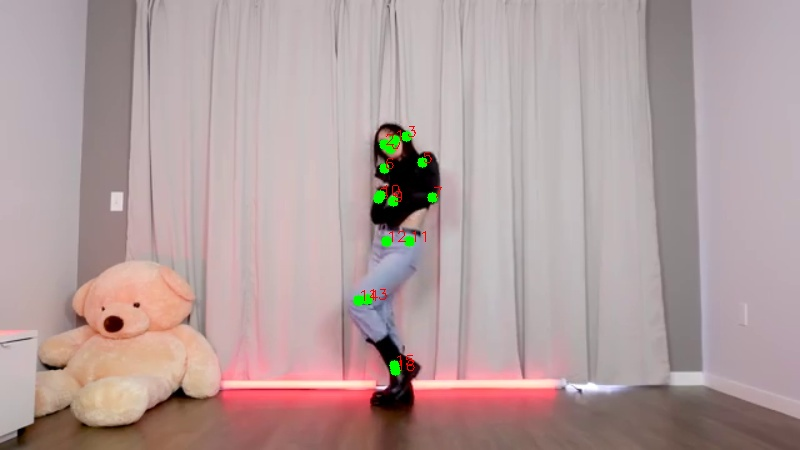

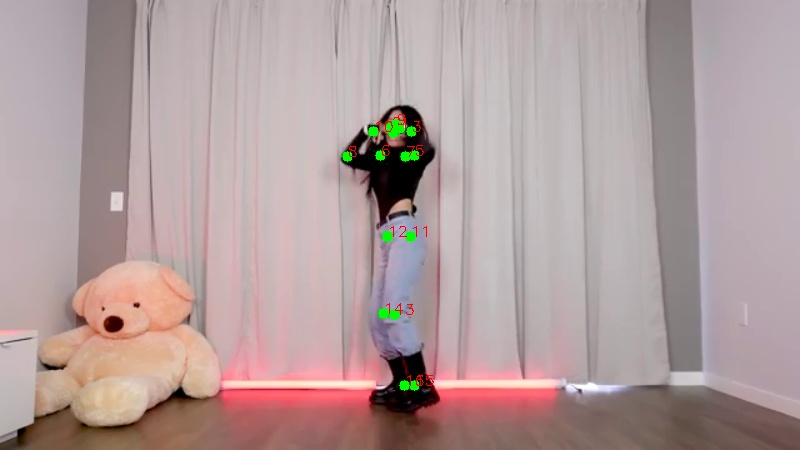

In [34]:
for _, row in sampled_images.iterrows():
    img = cv2.imdecode(np.frombuffer(row['image_bytes'], np.uint8), cv2.IMREAD_COLOR)
    for idx in range(17):  # Assuming 17 keypoints
        x, y, score = row[f'keypoint_{idx}_x'], row[f'keypoint_{idx}_y'], row[f'keypoint_{idx}_score']
        if score > 0.5:
            cv2.circle(img, (int(x), int(y)), 5, (0, 255, 0), -1)
            cv2.putText(img, str(idx), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    _, buffer = cv2.imencode('.jpg', img)
    display(Image(data=buffer.tobytes()))


In [ ]:

# You can save the dataframe to a CSV if needed
df.to_csv("pose_data.csv", index=False)